In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Adjust size of upcoming figures
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [4]:
data_directory = 'Data/20190315/'

In [5]:
# Create dataframe for listings
df_listings = pd.read_csv(data_directory + 'listings.csv.gz', dtype=str)
df_listings['accommodates'] = pd.to_numeric(df_listings['accommodates'])
df_listings['price'] = pd.to_numeric(df_listings['price'].str.replace(',', '').str.replace('$', ''))

In [6]:
df_listings['price'].isnull().sum()

0

In [7]:
# Create dataframe for calendar
df_calendar = pd.read_csv(data_directory + 'calendar.csv.gz', dtype=str)
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')
df_calendar['price'] = pd.to_numeric(df_calendar['price'].str.replace(',', '').str.replace('$', ''))
df_calendar = df_calendar.drop(columns = ['adjusted_price', 'minimum_nights', 'maximum_nights'])

In [8]:
df_calendar['price'].isnull().sum()

0

#### To answer: What is offered in Munich via Airbnb?

In [9]:
# data range for date
print(df_calendar['date'].min())
print(df_calendar['date'].max())

2019-03-15 00:00:00
2020-03-13 00:00:00


In [10]:
# number of listings
df_listings.shape

(9858, 106)

In [11]:
# total number of possible guests
print(df_listings['accommodates'].value_counts())
print(sum(df_listings['accommodates'].value_counts().values * df_listings['accommodates'].value_counts().index))

2     5193
4     1533
3     1221
1     1180
6      276
5      254
8       96
7       48
10      18
16      16
12      12
9        8
14       2
11       1
Name: accommodates, dtype: int64
26082


In [12]:
# numbers and percentages of room_types
print(df_listings['room_type'].value_counts())
print(df_listings['room_type'].value_counts(normalize=True))

Entire home/apt    5482
Private room       4194
Shared room         182
Name: room_type, dtype: int64
Entire home/apt    0.556097
Private room       0.425441
Shared room        0.018462
Name: room_type, dtype: float64


In [13]:
# numbers and percentages of guests per Entire home/apt
df_entire = df_listings[df_listings['room_type'] == 'Entire home/apt']
print(df_entire['accommodates'].value_counts(dropna=False).sort_index())
print(df_entire['accommodates'].value_counts(dropna=False, normalize=True).sort_index())

1      301
2     2416
3      857
4     1282
5      221
6      238
7       44
8       84
9        8
10      15
11       1
12      10
14       2
16       3
Name: accommodates, dtype: int64
1     0.054907
2     0.440715
3     0.156330
4     0.233856
5     0.040314
6     0.043415
7     0.008026
8     0.015323
9     0.001459
10    0.002736
11    0.000182
12    0.001824
14    0.000365
16    0.000547
Name: accommodates, dtype: float64


In [14]:
# numbers and percentages of guests per Private room
df_private = df_listings[df_listings['room_type'] == 'Private room']
print(df_private['accommodates'].value_counts(dropna=False).sort_index())
print(df_private['accommodates'].value_counts(dropna=False, normalize=True).sort_index())

1      822
2     2704
3      341
4      237
5       32
6       36
7        2
8        8
10       2
12       2
16       8
Name: accommodates, dtype: int64
1     0.195994
2     0.644731
3     0.081307
4     0.056509
5     0.007630
6     0.008584
7     0.000477
8     0.001907
10    0.000477
12    0.000477
16    0.001907
Name: accommodates, dtype: float64


In [15]:
# percentage of host listings for Entire home/apt still available for more than 56 days
i = 0
for id in df_entire['id']:
    try:
        if df_calendar[df_calendar['listing_id'] == id]['available'].value_counts().index[0] == 't':
            if df_calendar[df_calendar['listing_id'] == id]['available'].value_counts().values[0] > 56:
                i += 1
    except:
        pass

print(i/df_entire.shape[0])

0.14045968624589567


#### To answer:  How expensive are offers via Airbnb in Munich?

In [16]:
# statistics for prices
print(df_listings['price'].describe())

count     9858.00000
mean       108.80706
std        164.45711
min          8.00000
25%         50.00000
50%         80.00000
75%        120.00000
max      12000.00000
Name: price, dtype: float64


In [17]:
# statistics for prices separate for Entire home/apt and Private room
print(df_listings[df_listings['room_type'] == 'Entire home/apt']['price'].describe())
print(df_listings[df_listings['room_type'] == 'Private room']['price'].describe())

count     5482.000000
mean       132.417001
std        204.422039
min         10.000000
25%         65.000000
50%         95.000000
75%        150.000000
max      12000.000000
Name: price, dtype: float64
count    4194.000000
mean       79.199809
std        83.469068
min         8.000000
25%        40.000000
50%        60.000000
75%        95.000000
max      3000.000000
Name: price, dtype: float64


In [18]:
# statistics for prices for number of guests of Entire home/apt
for i in range(1, 5):
    print('accommodates = ' + str(i))
    dummy = df_listings[(df_listings['room_type'] == 'Entire home/apt') & (df_listings['accommodates'] == i)]['price']
    print(dummy.describe())

accommodates = 1
count    301.000000
mean      91.302326
std      132.205717
min       13.000000
25%       44.000000
50%       60.000000
75%       85.000000
max      999.000000
Name: price, dtype: float64
accommodates = 2
count    2416.000000
mean      102.328228
std        97.717412
min        15.000000
25%        60.000000
50%        80.000000
75%       110.000000
max      1500.000000
Name: price, dtype: float64
accommodates = 3
count    857.000000
mean     112.050175
std       65.709471
min       15.000000
25%       69.000000
50%       90.000000
75%      133.000000
max      450.000000
Name: price, dtype: float64
accommodates = 4
count     1282.000000
mean       157.209828
std        347.794418
min         10.000000
25%         80.000000
50%        115.000000
75%        180.000000
max      12000.000000
Name: price, dtype: float64


In [19]:
# statistics for prices for number of guests of Private room
for i in range(1, 5):
    print('accommodates = ' + str(i))
    dummy = df_listings[(df_listings['room_type'] == 'Private room') & (df_listings['accommodates'] == i)]['price']
    print(dummy.describe())

accommodates = 1
count    822.000000
mean      54.840633
std       44.498862
min       10.000000
25%       32.000000
50%       45.000000
75%       64.750000
max      650.000000
Name: price, dtype: float64
accommodates = 2
count    2704.000000
mean       79.555843
std        85.327385
min         8.000000
25%        44.750000
50%        61.000000
75%        99.000000
max      3000.000000
Name: price, dtype: float64
accommodates = 3
count     341.000000
mean       95.873900
std        90.947942
min        15.000000
25%        49.000000
50%        79.000000
75%       110.000000
max      1000.000000
Name: price, dtype: float64
accommodates = 4
count     237.000000
mean      115.459916
std       102.495698
min        27.000000
25%        55.000000
50%        85.000000
75%       149.000000
max      1000.000000
Name: price, dtype: float64


#### To answer: Do the prices change during the Octoberfest?

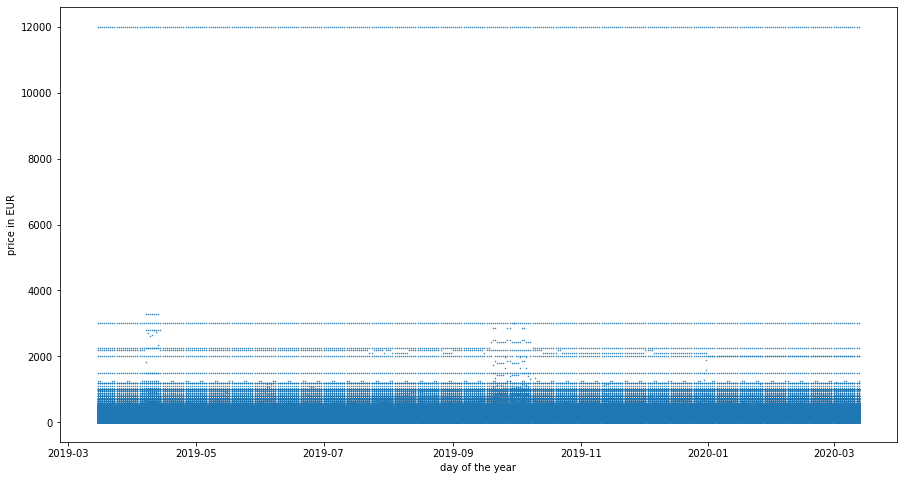

In [41]:
# Plot all prices during one year
plt.plot(df_calendar['date'], df_calendar['price'], '.', ms=1);
plt.xlabel('day of the year');
plt.ylabel('price in EUR');

In [42]:
# Select the two weeks of the Octoberfest
df_calendar_sep = df_calendar.loc[(df_calendar['date'] >= pd.to_datetime('2019-09-21', format='%Y-%m-%d')) 
                                  & (df_calendar['date'] <= pd.to_datetime('2019-10-06', format='%Y-%m-%d'))]

In [43]:
# Select two weeks in May for reference
df_calendar_may = df_calendar.loc[(df_calendar['date'] >= pd.to_datetime('2019-05-11', format='%Y-%m-%d'))
                                  & (df_calendar['date'] <= pd.to_datetime('2019-05-26', format='%Y-%m-%d'))]

In [53]:
# statistics for prices for the two weeks in September and May
print(df_calendar_sep['price'].describe())
print(df_calendar_may['price'].describe())
print((df_calendar_sep['price'].mean() - df_calendar_may['price'].mean())/df_calendar_may['price'].mean())

count    157632.000000
mean        130.535932
std         179.359341
min          10.000000
25%          59.000000
50%          91.000000
75%         150.000000
max       12000.000000
Name: price, dtype: float64
count    157632.000000
mean        105.032512
std         160.213060
min          10.000000
25%          50.000000
50%          79.000000
75%         120.000000
max       12000.000000
Name: price, dtype: float64
0.24281452252697375


In [45]:
# Calculate means for each listing for the two weeks in September and May and carry on room type
list_listing_id = []
list_mean_sep = []
list_mean_may = []
list_room_type = []
for listing_id in pd.unique(df_calendar_sep['listing_id']):
    list_listing_id.append(listing_id)
    list_mean_sep.append(df_calendar_sep[df_calendar_sep['listing_id'] == listing_id]['price'].mean())
    list_mean_may.append(df_calendar_may[df_calendar_may['listing_id'] == listing_id]['price'].mean())
    list_room_type.append(df_listings[df_listings['id'] == listing_id]['room_type'].to_numpy())

In [46]:
# Store means in dataframe
df_means = pd.DataFrame({'listing_id':list_listing_id, 'mean_sep':list_mean_sep, 'mean_may':list_mean_may, 'room_type':list_room_type})

In [47]:
# Calculate rise in prices between the two weeks in September and May
df_means['rise'] = (df_means['mean_sep'] - df_means['mean_may'])/df_means['mean_may']

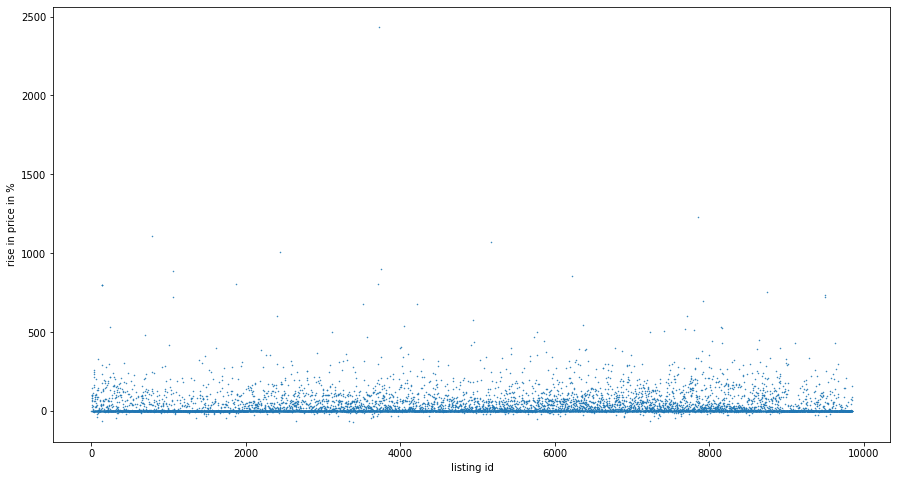

In [48]:
# Plot rise in price versus listing_id
plt.plot(df_means['rise'] * 100, '.', ms=1);
plt.xlabel('listing id');
plt.ylabel('rise in price in %');

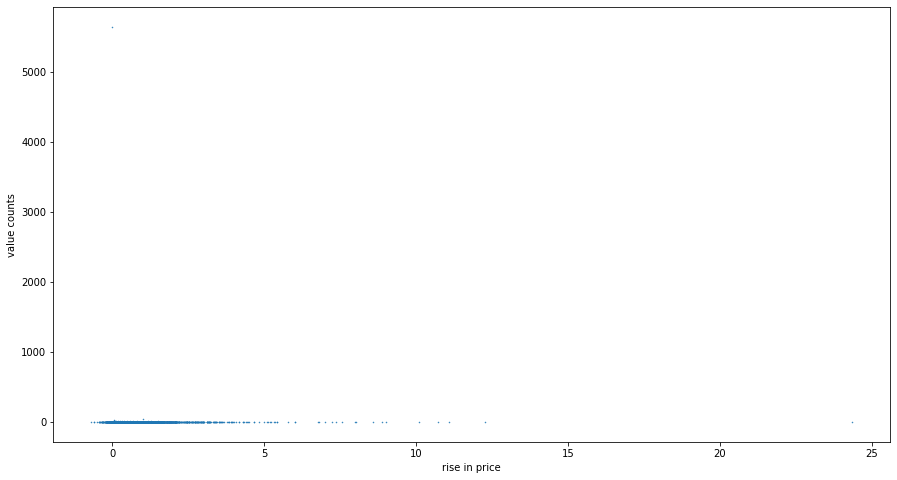

In [49]:
# Plot number of hosts versus rise in price
plt.plot(df_means['rise'].value_counts(dropna=False).sort_index(), '.', ms=1);
plt.xlabel('rise in price');
plt.ylabel('value counts');

In [50]:
# Percentages of change in prices
s0 = df_means[df_means['rise'] < 0].shape[0]/df_means.shape[0]
e0 = df_means[df_means['rise'] == 0].shape[0]/df_means.shape[0]
s1 = df_means[(df_means['rise'] > 0) & (df_means['rise'] <= 0.5)].shape[0]/df_means.shape[0]
s2 = df_means[(df_means['rise'] > 0.5) & (df_means['rise'] <= 1)].shape[0]/df_means.shape[0]
s3 = df_means[(df_means['rise'] > 1) & (df_means['rise'] <= 2)].shape[0]/df_means.shape[0]
b = df_means[df_means['rise'] > 2].shape[0]/df_means.shape[0]
print("<0:{0:5.2f}; =0:{1:5.2f}; >0,<=0.5:{2:5.2f}; >0.5,<=1:{3:5.2f}; >1,<=2:{4:5.2f}; >2:{5:5.2f}".format(s0, e0, s1, s2, s3, b))

<0: 0.03; =0: 0.57; >0,<=0.5: 0.21; >0.5,<=1: 0.09; >1,<=2: 0.07; >2: 0.03


In [51]:
# Percentages of change in prices for Entire home/apt
df_means_entire = df_means[df_means['room_type'] == 'Entire home/apt']
s0 = df_means_entire[df_means_entire['rise'] < 0].shape[0]/df_means_entire.shape[0]
e0 = df_means_entire[df_means_entire['rise'] == 0].shape[0]/df_means_entire.shape[0]
s1 = df_means_entire[(df_means_entire['rise'] > 0) & (df_means_entire['rise'] <= 0.5)].shape[0]/df_means_entire.shape[0]
s2 = df_means_entire[(df_means_entire['rise'] > 0.5) & (df_means_entire['rise'] <= 1)].shape[0]/df_means_entire.shape[0]
s3 = df_means_entire[(df_means_entire['rise'] > 1) & (df_means_entire['rise'] <= 2)].shape[0]/df_means_entire.shape[0]
b = df_means_entire[df_means_entire['rise'] > 2].shape[0]/df_means_entire.shape[0]
print("<0:{0:5.2f}; =0:{1:5.2f}; >0,<=0.5:{2:5.2f}; >0.5,<=1:{3:5.2f}; >1,<=2:{4:5.2f}; >2:{5:5.2f}".format(s0, e0, s1, s2, s3, b))

<0: 0.03; =0: 0.55; >0,<=0.5: 0.21; >0.5,<=1: 0.10; >1,<=2: 0.07; >2: 0.03


In [52]:
# Percentages of change in prices for Private room
df_means_private = df_means[df_means['room_type'] == 'Private room']
s0 = df_means_private[df_means_private['rise'] < 0].shape[0]/df_means_private.shape[0]
e0 = df_means_private[df_means_private['rise'] == 0].shape[0]/df_means_private.shape[0]
s1 = df_means_private[(df_means_private['rise'] > 0) & (df_means_private['rise'] <= 0.5)].shape[0]/df_means_private.shape[0]
s2 = df_means_private[(df_means_private['rise'] > 0.5) & (df_means_private['rise'] <= 1)].shape[0]/df_means_private.shape[0]
s3 = df_means_private[(df_means_private['rise'] > 1) & (df_means_private['rise'] <= 2)].shape[0]/df_means_private.shape[0]
b = df_means_private[df_means_private['rise'] > 2].shape[0]/df_means_private.shape[0]
n = df_means_private['rise'].isnull().sum()/df_means_private.shape[0]
print("<0:{0:5.2f}; =0:{1:5.2f}; >0,<=0.5:{2:5.2f}; >0.5,<=1:{3:5.2f}; >1,<=2:{4:5.2f}; >2:{5:5.2f}".format(s0, e0, s1, s2, s3, b))

<0: 0.03; =0: 0.60; >0,<=0.5: 0.20; >0.5,<=1: 0.08; >1,<=2: 0.06; >2: 0.02
